In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from os.path import join, abspath
from hammer import dm 
from time import time
import pandas as pd
root_dir = abspath(join('..', '..'))
import sys
sys.path.append(root_dir)
import vaex
from scipy.stats import norm
from utils import plot_chain, plot_corner, style, concat
from scipy.integrate import simps

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [12]:
style('ggplot')

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir 

'/home2/s20321005/Thesis-Project/Data'

In [5]:
name = "Baryon"
baryon_dir = join(root_data_dir, name)
baryon_dir

'/home2/s20321005/Thesis-Project/Data/Baryon'

In [6]:
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [7]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhoDM = 0.02
log_nu0 = 0
R = 3.4E-3
zsun = 30

theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun)

w0 = -7.
sigma1 = 10.
sigma2 = 15.
log_sigmaw1 = np.log(sigma1)
log_sigmaw2 = np.log(sigma2)

a1 = 1.
a2 = 0.2
log_a1 = np.log(a1)
log_a2 = np.log(a2)
psi = concat(w0, log_sigmaw1, log_sigmaw2, log_a1, log_a2)
theta.shape, psi.shape

((28,), (5,))

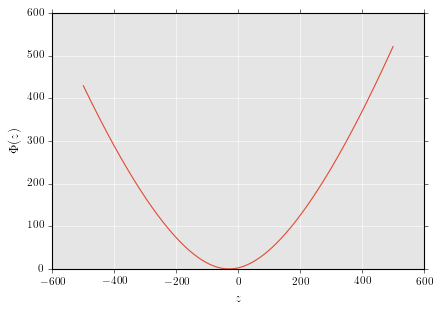

In [13]:
z_start = -500
z_end = 500
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = dm.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


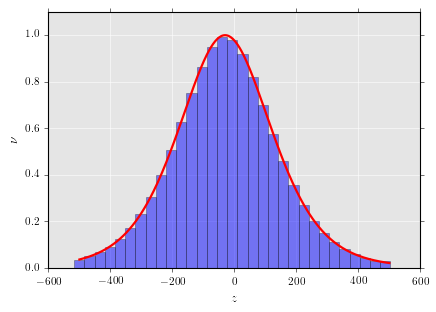

In [15]:
z = np.linspace(-500, 500, 305)
dz = z[10] - z[0]
fz = dm.fz(z[::10], theta, psi, dz)
fz_smooth = dm.fz(z, theta, psi, dz/10)
plt.figure(figsize=(6, 4))
plt.bar(z[::10], fz, width=dz, color='b', alpha=0.5, ec="k")
plt.plot(z, fz_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.ylim(0, 1.1)
plt.show()

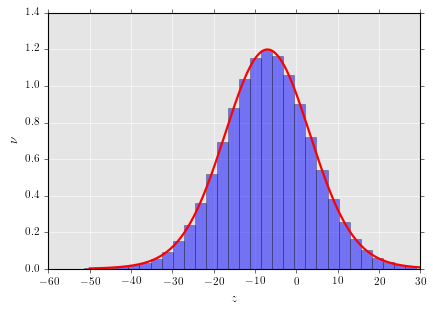

In [17]:
w = np.linspace(-50, 30, 300)
dw = w[10] - w[0]
fw = dm.fw(w[::10], theta, psi, dz)
fw_smooth = dm.fw(w, theta, psi, dz)
plt.figure(figsize=(6, 4))
plt.bar(w[::10], fw, width=dw, color='b', alpha=0.5, ec="k")
plt.plot(w, fw_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.ylim(0, 1.4)
plt.show()

## Sample

In [18]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhoDM = 0.02
log_nu0 = 0
R = 3.4E-3
zsun = 30

theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun)

w0 = -7.
sigma1 = 10.
sigma2 = 15.
log_sigmaw1 = np.log(sigma1)
log_sigmaw2 = np.log(sigma2)

a1 = 1.
a2 = 0.2
log_a1 = np.log(a1)
log_a2 = np.log(a2)
psi = concat(w0, log_sigmaw1, log_sigmaw2, log_a1, log_a2)
theta.shape, psi.shape

((28,), (5,))

In [19]:
N = 5000

z = np.random.randn(N)*200
w = np.random.randn(N)*15
dz = 1
pos = np.array([z, w]).T
pos.shape

(5000, 2)

In [20]:
pot = dm.fzw(pos, theta, psi, dz)
pot.shape

(5000,)

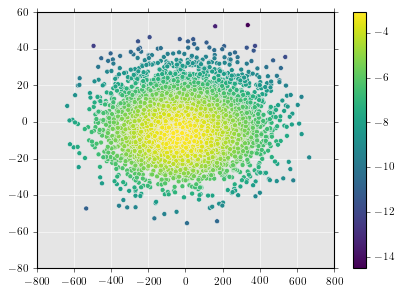

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')
plt.colorbar()

In [22]:
# number of walkers
N = 16

z = np.random.randn(N)*200
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

(16, 2)

In [23]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

t0 = time()
chain = dm.sample(50_000, nwalkers, pos, theta, psi, dz=1., verbose=True, parallel=True)
print(time() - t0, "s")

128.44374895095825 s


2it [00:00, 26.61it/s]


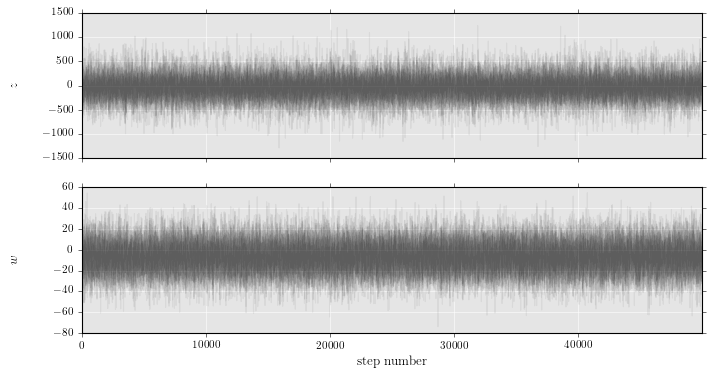

In [25]:
plot_chain() \
    .params(chain) \
    .labels([r'$z$', r'$w$']) \
    .figsize((10, 5)) \
    .alpha(0.05) \
    .run()

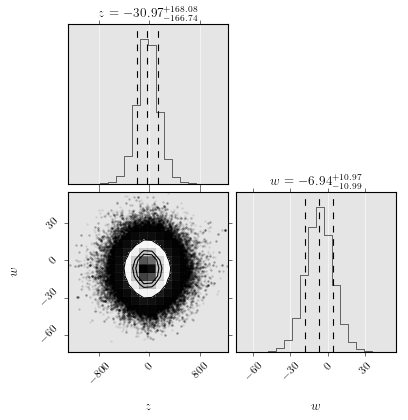

In [27]:
plot_corner() \
    .params(chain) \
    .burn(100) \
    .labels([r'$z$', r'$w$']) \
    .run()

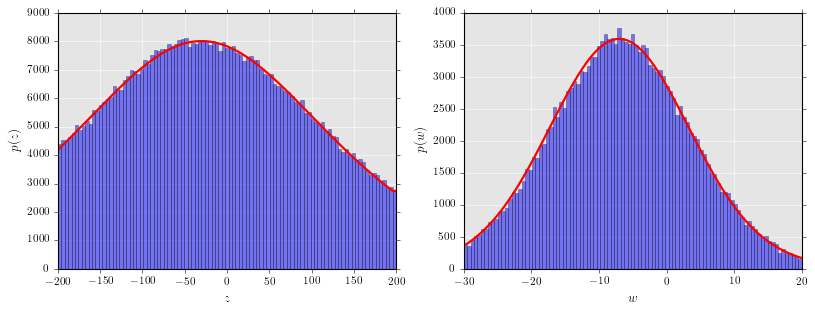

In [28]:
z_sample = chain[:, :, 0].flatten()
w_sample = chain[:, :, 1].flatten()
mask = (z_sample > -50) & (z_sample < 50)
w_sample = w_sample[mask]

z_edge = np.linspace(-200, 200, 100)
dz = z_edge[1] - z_edge[0]
z_mid = (z_edge[:-1] + z_edge[1:])/2
z_num, _ = np.histogram(z_sample, bins=z_edge)
ztot = simps(z_num, z_mid)
zs = np.linspace(z_edge.min(), z_edge.max(), 1000)
fz = dm.fz(zs, theta, psi, dz)
fz = fz * ztot / simps(fz, zs)

w_edge = np.linspace(-30, 20, 100)
dw = w_edge[1] - w_edge[0]
w_mid = (w_edge[:-1] + w_edge[1:])/2
w_num, _ = np.histogram(w_sample, bins=w_edge)
wtot = simps(w_num, w_mid)
ws = np.linspace(w_edge.min(), w_edge.max(), 1000)
fw = dm.fw(ws, theta, psi, dw)
fw = fw * wtot / simps(fw, ws)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(z_mid, z_num, width=dz, color='b', alpha=0.5, ec="k")
axes[0].plot(zs, fz, color='r', lw=2)
axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel(r'$p(z)$')
axes[1].bar(w_mid, w_num, width=dw, color='b', alpha=0.5, ec="k")
axes[1].plot(ws, fw, color='r', lw=2)
axes[1].set_xlabel(r'$w$')
axes[1].set_ylabel(r'$p(w)$')
plt.show()

# different $z$, $N=5000$

figure out the size of the generated data, using gaussian distribution

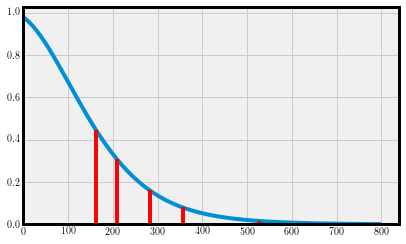

[162. 208. 282. 356. 526. 721.]


In [22]:
theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun)
psi = concat(w0, log_sigmaw1, log_sigmaw2, log_a1, log_a2)
dz = 0.1
z = np.arange(0, 800, dz)
fz = dm.fz(z, theta, psi, dz)
cum_fz = np.cumsum(fz)*dz
cum_fz /= cum_fz[-1]
alpha_level = [.7, 0.8, 0.9, 0.95, 0.99, 0.999]
num = len(alpha_level)
zb = np.empty(num)
args = np.empty(num, dtype=int)
for i, alp in enumerate(alpha_level):
    arg_z = np.argmin(np.abs(cum_fz - alp)).astype(int)
    zbi= z[arg_z]
    zb[i] = np.round(zbi)
    args[i] = arg_z

plt.plot(z, fz)
for i in range(num):
    plt.plot([zb[i], zb[i]], [0, fz[args[i]]], 'r')
plt.xlim(0)
plt.ylim(0)
plt.show()
print(zb)

generate...

5000


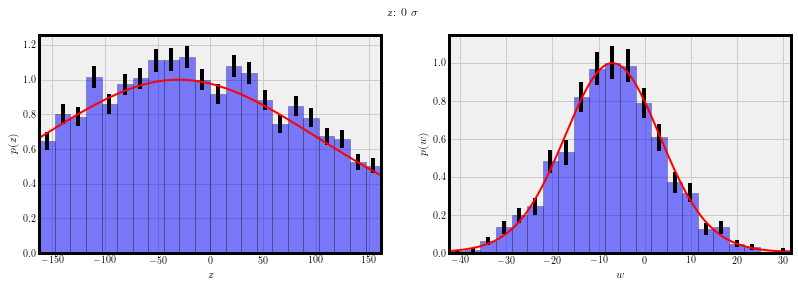

[-154.54541841 -139.83510998 -125.12480155 -110.41449313  -95.7041847
  -80.99387627  -66.28356784  -51.57325942  -36.86295099  -22.15264256
   -7.44233414    7.26797429   21.97828272   36.68859115   51.39889957
   66.109208     80.81951643   95.52982486  110.24013328  124.95044171
  139.66075014  154.37105857]
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_162.hdf5 and w_162.hdf5
5000


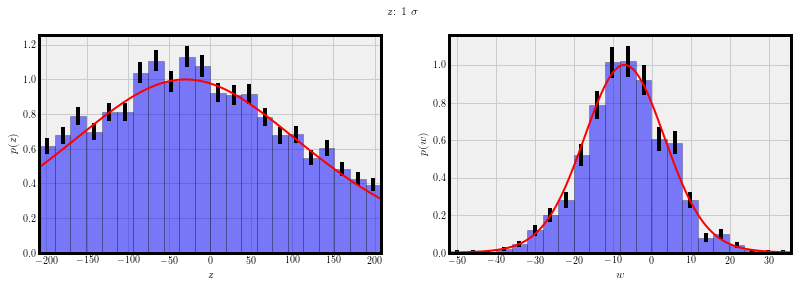

[-198.50115334 -179.59549747 -160.68984161 -141.78418574 -122.87852988
 -103.97287401  -85.06721815  -66.16156228  -47.25590641  -28.35025055
   -9.44459468    9.46106118   28.36671705   47.27237291   66.17802878
   85.08368464  103.98934051  122.89499637  141.80065224  160.7063081
  179.61196397  198.51761983]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_208.hdf5 and w_208.hdf5
5000


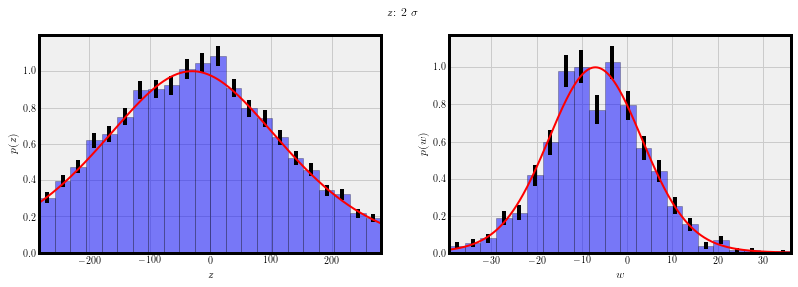

[-269.06988288 -243.45497986 -217.84007684 -192.22517382 -166.6102708
 -140.99536778 -115.38046476  -89.76556174  -64.15065872  -38.5357557
  -12.92085268   12.69405034   38.30895336   63.92385638   89.5387594
  115.15366242  140.76856544  166.38346846  191.99837148  217.6132745
  243.22817752  268.84308054]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_282.hdf5 and w_282.hdf5
5000


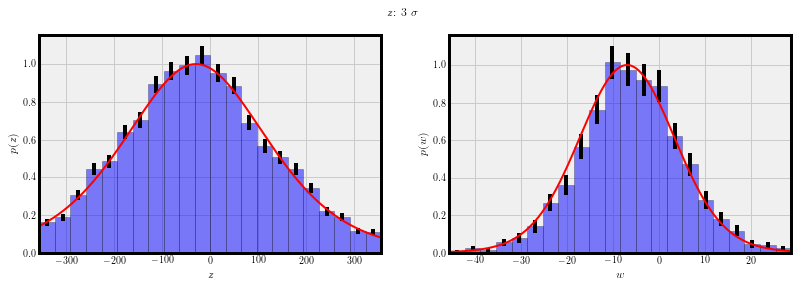

[-339.79139026 -307.45779351 -275.12419676 -242.79060001 -210.45700326
 -178.12340651 -145.78980976 -113.45621301  -81.12261626  -48.78901951
  -16.45542276   15.87817399   48.21177074   80.54536749  112.87896423
  145.21256098  177.54615773  209.87975448  242.21335123  274.54694798
  306.88054473  339.21414148]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_356.hdf5 and w_356.hdf5
5000


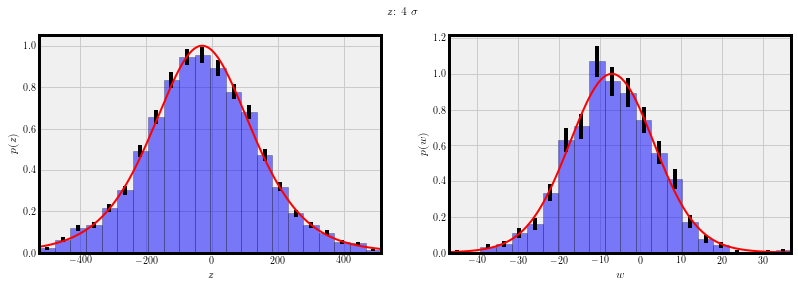

[-500.27968963 -453.13682209 -405.99395455 -358.85108701 -311.70821948
 -264.56535194 -217.4224844  -170.27961686 -123.13674933  -75.99388179
  -28.85101425   18.29185329   65.43472083  112.57758836  159.7204559
  206.86332344  254.00619098  301.14905851  348.29192605  395.43479359
  442.57766113  489.72052866]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_526.hdf5 and w_526.hdf5
5000


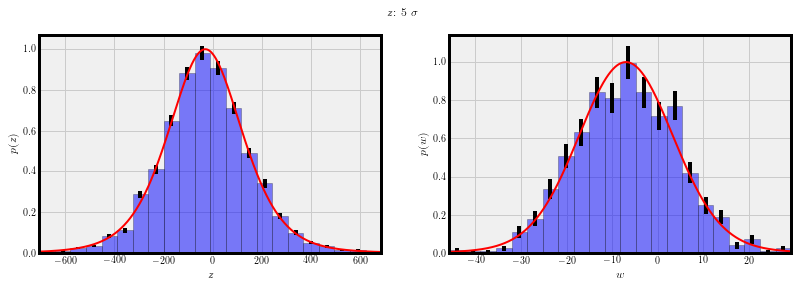

[-673.96467849 -610.72071552 -547.47675255 -484.23278958 -420.98882661
 -357.74486364 -294.50090067 -231.2569377  -168.01297473 -104.76901176
  -41.52504878   21.71891419   84.96287716  148.20684013  211.4508031
  274.69476607  337.93872904  401.18269201  464.42665498  527.67061795
  590.91458092  654.15854389]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_721.hdf5 and w_721.hdf5


#,mid,num,err
0,-673.9646784885524,0.007581625319364094,0.0030951855755679304
1,-610.7207155181854,0.00884522953925811,0.0033431825214513414
2,-547.4767525478187,0.02274487595809228,0.005361018675737975
3,-484.2327895774518,0.03285370971724441,0.0064431425746977735
4,-420.9888266070849,0.08339787851300504,0.010265569210679048
...,...,...,...
17,401.1826920076843,0.04928056457586661,0.007891205824005898
18,464.42665497805115,0.03159010549735039,0.006318021099470078
19,527.670617948418,0.013899646418834174,0.004190901080898189
20,590.9145809187848,0.012636042198940156,0.003995867395865338


In [23]:
import vaex

Nz = 5000
Nw = 1000
burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
for i, zbi in enumerate(zb):
    mask = np.abs(z) < zbi
    z_sample = z[mask]
    index = np.random.randint(0, len(z_sample), Nz)
    z_sample = z_sample[index]

    znum, zedge = np.histogram(z_sample, bins=22)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = dm.fz(zs, theta, psi, zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    zbound = 50
    mask = np.abs(z) < zbound
    w_sample = w[mask]
    index = np.random.randint(0, len(w_sample), Nw)
    w_sample = w_sample[index]
    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = dm.fw(ws, theta, psi, ws[1]-ws[0])
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    print(len(z_sample))
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$z$: {} $\sigma$'.format(i))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(mid=wmid, num=wnum, err=werr)
    print(zmid)
    df_z.export(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data', 'z', f'z_{int(zbi)}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data' ,'z', f'w_{int(zbi)}.hdf5'), progress=True)
    print(f"saved z_{int(zbi)}.hdf5 and w_{int(zbi)}.hdf5")
    # break
df_z

# different $N$, $z=z_b$

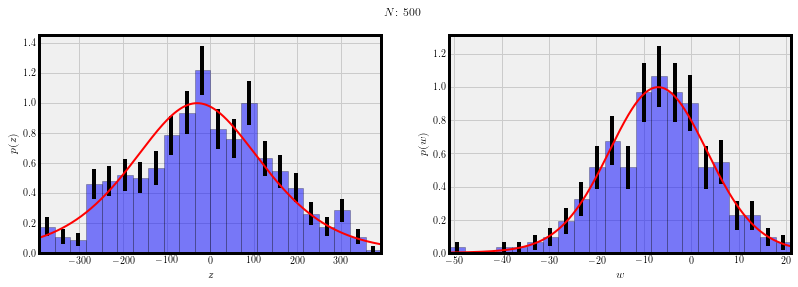

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_00500.hdf5 and w_00500.hdf5


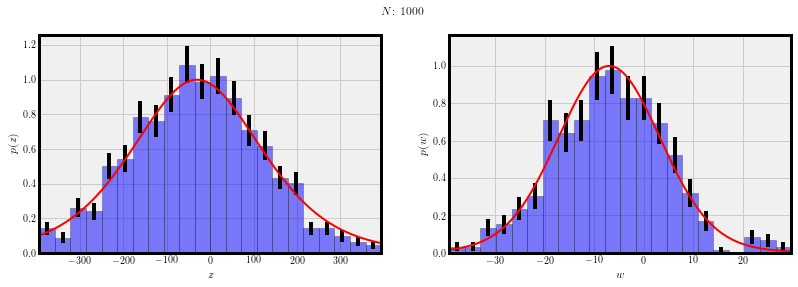

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_01000.hdf5 and w_01000.hdf5


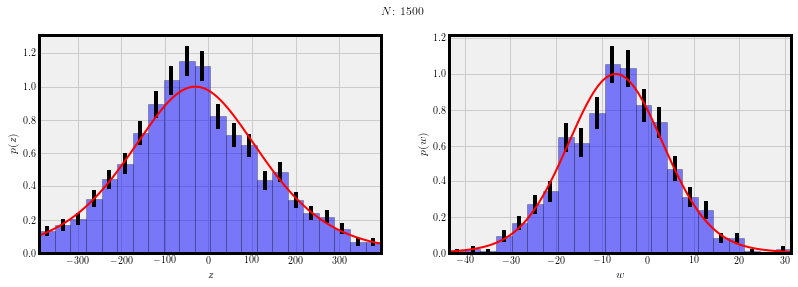

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_01500.hdf5 and w_01500.hdf5


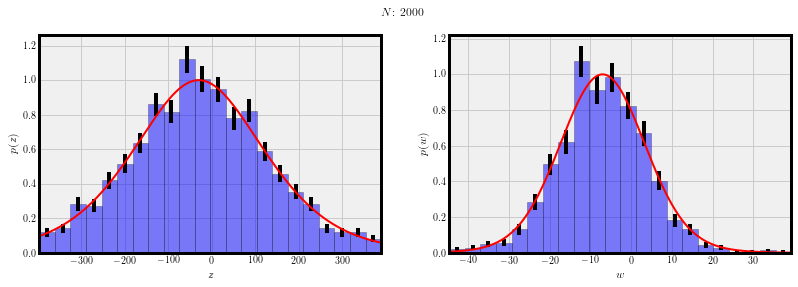

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_02000.hdf5 and w_02000.hdf5


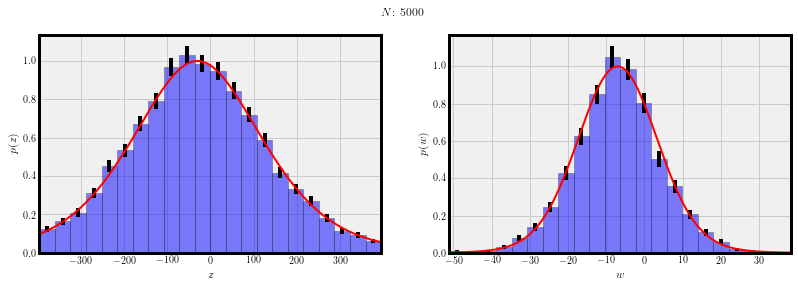

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_05000.hdf5 and w_05000.hdf5


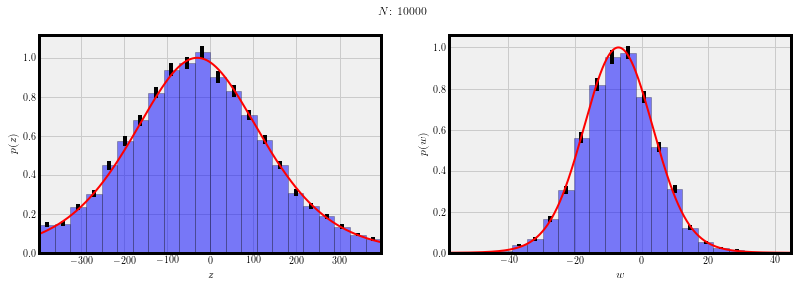

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_10000.hdf5 and w_10000.hdf5


In [25]:
import vaex

zb = 396.44960851

burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z) < zb
z_s = z[mask]
w_s = w[mask]
# for Nz in [500, 1000, 5000, 10_000, 50_000, 100_000]:
for Nz, Nw in [(500, 250), (1000, 500), (1500, 750), (2000, 1000), (5000, 2000), (10_000, 5000)]:
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    znum, zedge = np.histogram(z_sample, bins=22)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = dm.fz(zs, theta, psi, zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    zbound = 50
    mask = np.abs(z_s) < zbound
    w_sample = w_s[mask]
    index = np.random.randint(0, len(w_sample), Nw)
    w_sample = w_sample[index]
    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = dm.fw(ws, theta, psi, ws[1]-ws[0])
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(mid=wmid, num=wnum, err=werr)
    df_z.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data', 'n', f'z_{Nz:05d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data' ,'n', f'w_{Nz:05d}.hdf5'), progress=True)
    print(f"saved z_{Nz:05d}.hdf5 and w_{Nz:05d}.hdf5")
    # break

# for comparison model

In [17]:
from matplotlib import pyplot as plt
import numpy as np
from os.path import join, abspath
from hammer import dm
from time import time
import pandas as pd
from scipy.integrate import simps
root_dir = abspath(join('..', '..'))
root_data_dir = join(root_dir, "Data")
import sys
sys.path.append(root_dir)
import vaex
from scipy.stats import norm
from utils import style, concat

In [9]:
name = "Baryon"
baryon_dir = join(root_data_dir, name)
baryon_dir

'/home2/s20321005/Thesis-Project/Data/Baryon'

In [10]:
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [13]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhoDM = 0.02
log_nu0 = 0
R = 3.4E-3
zsun = 30

theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun)

w0 = -7.
sigma1 = 10.
sigma2 = 15.
log_sigmaw1 = np.log(sigma1)
log_sigmaw2 = np.log(sigma2)

a1 = 1.
a2 = 0.2
log_a1 = np.log(a1)
log_a2 = np.log(a2)
psi = concat(w0, log_sigmaw1, log_sigmaw2, log_a1, log_a2)
theta.shape, psi.shape

((28,), (5,))

In [14]:
chain = np.load(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data', 'mock', 'chain.npy'))
chain.shape

(1001000, 16, 2)

In [15]:
burn = 1000
z = chain[burn:, :, 0].flatten()

zfit = norm.fit(z)
zfit

(-30.30253516305729, 184.1972597562057)

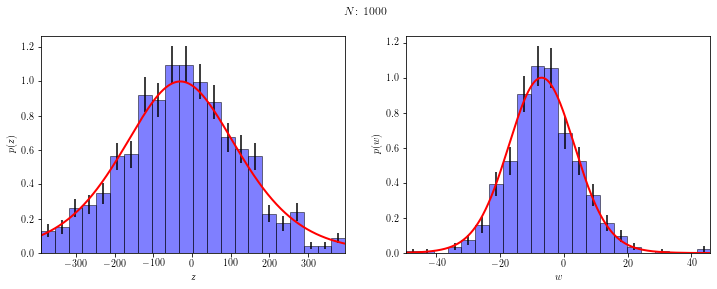

export(hdf5) [########################################] 100.00% elapsed time  :     0.05s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 saved z_0001000.hdf5 and w_0001000.hdf5


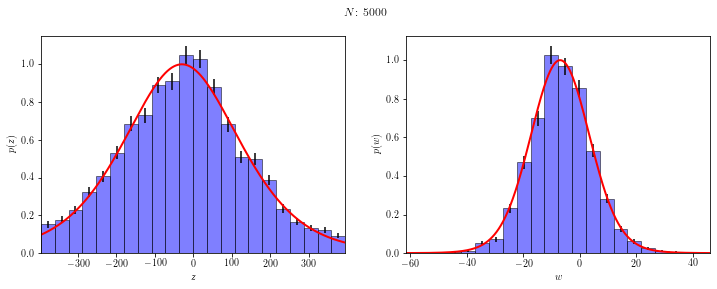

export(hdf5) [########################################] 100.00% elapsed time  :     0.05s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 saved z_0005000.hdf5 and w_0005000.hdf5


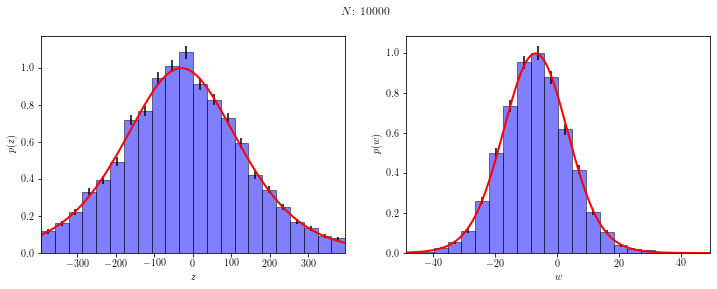

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 saved z_0010000.hdf5 and w_0010000.hdf5


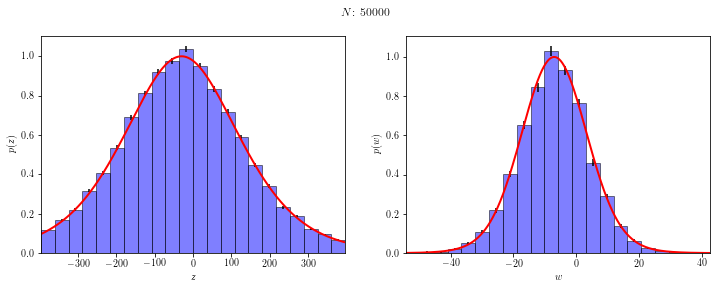

export(hdf5) [########################################] 100.00% elapsed time  :     0.07s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 saved z_0050000.hdf5 and w_0050000.hdf5


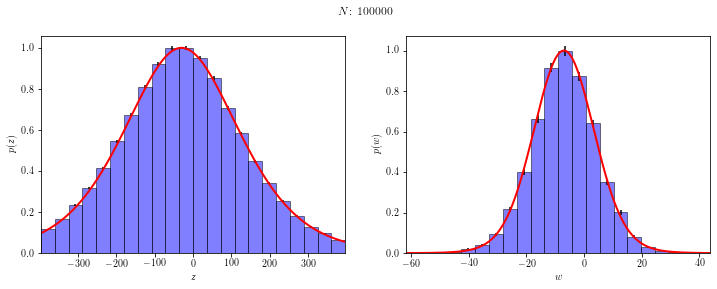

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 saved z_0100000.hdf5 and w_0100000.hdf5


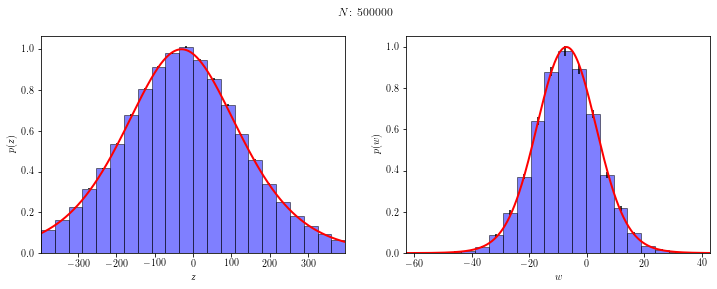

export(hdf5) [########################################] 100.00% elapsed time  :     0.05s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0500000.hdf5 and w_0500000.hdf5


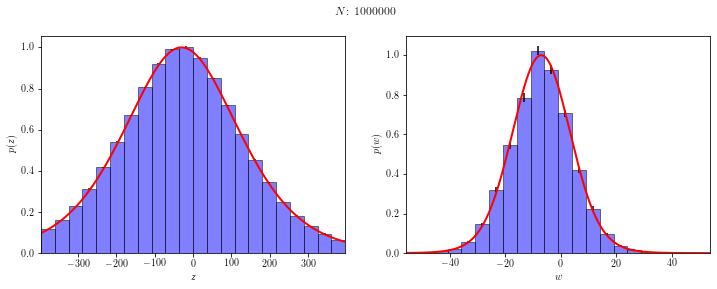

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 saved z_1000000.hdf5 and w_1000000.hdf5


In [21]:
import vaex

zb = 396.44960851

burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z) < zb
z_s = z[mask]
w_s = w[mask]
for Nz, Nw in [(1000, 500), (5000, 2500), (10_000, 5000), (50_000, 10_000), (100_000, 10_000), (500_000, 10_000), (1_000_000, 10_000)]:
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    znum, zedge = np.histogram(z_sample, bins=22)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = dm.fz(zs, theta, psi, zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    zbound = 50
    mask = np.abs(z_s) < zbound
    w_sample = w_s[mask]
    index = np.random.randint(0, len(w_sample), Nw)
    w_sample = w_sample[index]
    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = dm.fw(ws, theta, psi, ws[1]-ws[0])
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(mid=wmid, num=wnum, err=werr)
    df_z.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data', 'mock', f'z_{Nz:07d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data' ,'mock', f'w_{Nz:07d}.hdf5'), progress=True)
    print(f"saved z_{Nz:07d}.hdf5 and w_{Nz:07d}.hdf5")
    # break